In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import SGDRegressor

In [3]:
sgd = SGDRegressor()

In [4]:
#some random data

X = [[-1], [0], [1], [2], [1.5]]
y = [0, 0, 1, 1, 1]

In [5]:
sgd.fit(X, y)

SGDRegressor()

In [10]:
sgd.predict([[-1]])

array([-0.10574487])

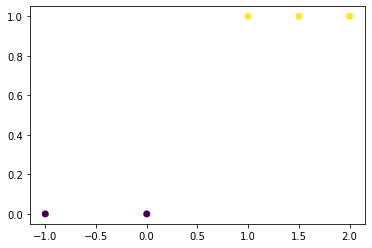

In [12]:
plt.scatter(X, y, c=y)

In [14]:
# From -4 to 4 take 6 equal distanced points
xs = np.linspace(-4, 4, 6)
xs

array([-4. , -2.4, -0.8,  0.8,  2.4,  4. ])

In [15]:
xs = np.linspace(-4, 4, 50)
xs

array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
       -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
       -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
       -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
       -0.73469388, -0.57142857, -0.40816327, -0.24489796, -0.08163265,
        0.08163265,  0.24489796,  0.40816327,  0.57142857,  0.73469388,
        0.89795918,  1.06122449,  1.2244898 ,  1.3877551 ,  1.55102041,
        1.71428571,  1.87755102,  2.04081633,  2.20408163,  2.36734694,
        2.53061224,  2.69387755,  2.85714286,  3.02040816,  3.18367347,
        3.34693878,  3.51020408,  3.67346939,  3.83673469,  4.        ])

In [18]:
ys = sgd.predict(xs.reshape(-1,1))

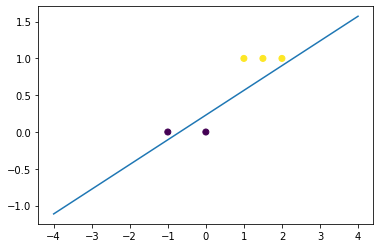

In [19]:
plt.scatter(X, y, c=y)
plt.plot(xs, ys)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X, y)

LogisticRegression()

In [23]:
lr.coef_

array([[1.08075566]])

In [24]:
xs = np.linspace(-4, 4, 50)
ys = lr.predict(xs.reshape(-1,1))

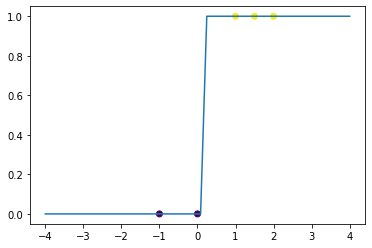

In [25]:
plt.scatter(X, y, c=y)
plt.plot(xs, ys)

In [27]:
from sklearn.datasets import make_moons, make_circles, make_classification

In [47]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

X+= 2* np.random.uniform(size=X.shape)

In [48]:
X[:10], y[:10]

(array([[ 3.11002252,  0.8595225 ],
        [ 1.33500551,  1.19216566],
        [ 0.26935181,  3.50840802],
        [ 2.53618026,  1.67583689],
        [ 0.47923463,  3.21988305],
        [ 2.24090386,  2.606555  ],
        [ 1.9748904 ,  0.62888832],
        [ 2.4343338 ,  0.51552248],
        [-0.2599793 ,  3.43288334],
        [-0.90061622,  0.9334405 ]]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0]))

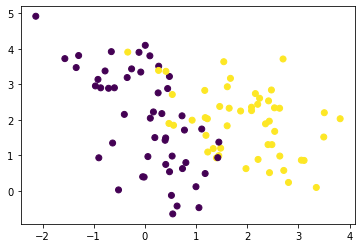

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [50]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [51]:
lr.score(X, y)

0.91

In [61]:
X, y = make_circles(noise = 0.2, factor=0.5)

In [62]:
X[:10], y[:10]

(array([[ 0.01437631, -0.63529662],
        [-0.53430435, -0.09944358],
        [ 0.31782051, -0.43288902],
        [ 0.47264209,  0.71877998],
        [ 0.70531119, -0.20133798],
        [ 0.50452506,  0.87972881],
        [-0.77747645, -0.69038736],
        [-0.12939945, -1.46261896],
        [-0.55066342, -0.15412871],
        [-0.24933707,  0.93603576]]),
 array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64))

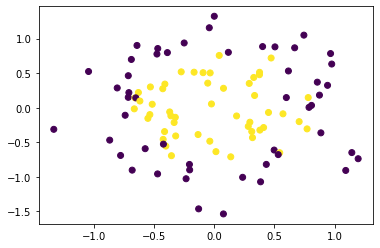

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [69]:
X, y = make_moons(noise= 0.3)

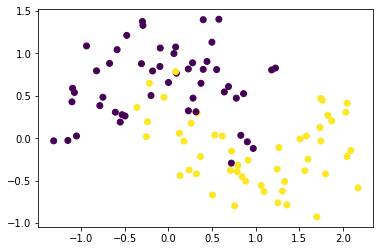

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pipe = Pipeline([('pf', PolynomialFeatures(1)), ('lr', LogisticRegression())])
pipe

Pipeline(steps=[('pf', PolynomialFeatures(degree=1)),
                ('lr', LogisticRegression())])

In [76]:
pipe.fit(X, y)

Pipeline(steps=[('pf', PolynomialFeatures(degree=1)),
                ('lr', LogisticRegression())])

In [83]:
pipe.predict([X[0]])

array([1], dtype=int64)

In [90]:
data = pd.read_csv('archive/age_gender.csv')
X = []
for x in data.pixels:
    pxl = x.split(" ")
    X.append([int(p) for p in pxl])
X = np.array(X)
y = np.array(data.gender)

In [91]:
from sklearn.model_selection import train_test_split
nr_iters=[1, 5, 10, 20, 50, 100, 200, 500]
X_train, X_test, y_train, y_test = train_test_split(X, y)
train_scores = []
valid_scores = []
for niter in nr_iters:
    lr = LogisticRegression(max_iter=niter)
    lr.fit(X_train, y_train)
    train_scores.append(lr.score(X_train, y_train))
    valid_scores.append(lr.score(X_test, y_test))

c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [92]:
data = pd.read_csv("archive/IMDB_Dataset.csv")

In [93]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [95]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'])
X_train, X_test, y_train, y_test

(31058    When I first watched this film, I thought that...
 8052     Beyond the Clouds is in many ways the weirdest...
 21580    I first saw this movie around 1968 and if I do...
 25042    <br /><br />One of the best films I've ever se...
 46804    I gave this movie such a high mark because it ...
                                ...                        
 24801    I was thinking that the main character, the as...
 39965    Well as you can see, I got to this party quite...
 37772    Dubbed beyond comprehension, the HBO version o...
 3100     Having not seen this film in about 20 years I ...
 48476    I also joined IMDB for the sole purpose of com...
 Name: review, Length: 37500, dtype: object,
 27373    What seemed as a good premise for a movie...un...
 39378    I never expect a film adaptation to follow too...
 16067    Thank the Lord for Martin Scorsese, and his lo...
 21114    Waco: Rules of Engagement does a very good job...
 6816     some people think that the second series was 

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
cv = CountVectorizer()

In [109]:
test_data = ["The cat is on the table", "The dog is on the table", "The table is on the dog", "The table is on the cat",
              "cat cat cat the", "the the cat cat", "mouse dog cat", "the dog is on the cat"]

In [110]:
processed = cv.fit_transform(test_data)

In [114]:
processed.toarray()

array([[1, 0, 1, 0, 1, 1, 2],
       [0, 1, 1, 0, 1, 1, 2],
       [0, 1, 1, 0, 1, 1, 2],
       [1, 0, 1, 0, 1, 1, 2],
       [3, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 2],
       [1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 2]], dtype=int64)

In [112]:
cv.vocabulary_

{'the': 6, 'cat': 0, 'is': 2, 'on': 4, 'table': 5, 'dog': 1, 'mouse': 3}

In [115]:
lr = LogisticRegression()

In [129]:
cv = CountVectorizer(ngram_range=(1,2))
X_transform = cv.fit_transform(X_train)

In [130]:
lr.fit(X_transform, y_train)

c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
lr.score(cv.transform(X_test), y_test)

0.90856

In [126]:
test_sentences = ["This movie sucks", "Tenet is the best movie ever", "I love to hate this movie", "I do not hate Inception, I actually like it"]

In [127]:
lr.predict(cv.transform(test_sentences))

array(['negative', 'positive', 'positive', 'negative'], dtype=object)

In [128]:
lr.predict_proba(cv.transform(test_sentences))

array([[0.79222081, 0.20777919],
       [0.28862114, 0.71137886],
       [0.44240589, 0.55759411],
       [0.58837858, 0.41162142]])

In [132]:
from sklearn import datasets